In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot  as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from IPython.display import display
from plotly.subplots import make_subplots

In [2]:
dwarka_df=pd.read_csv('Dwarka Indoor 1 month.csv')

In [3]:
dwarka_df

CreatedDate  pm25_1201240072  pm10_1201240072  co2_1201240072  \
0    01-04-2024 01:00             30.0             82.5           426.0   
1    01-04-2024 02:00             27.0             73.5           462.5   
2    01-04-2024 03:00             30.5             84.0           464.0   
3    01-04-2024 04:00             38.5            104.5           473.5   
4    01-04-2024 05:00             66.5            163.0           484.0   
..                ...              ...              ...             ...   
714  30-04-2024 19:00             27.5             75.5           440.0   
715  30-04-2024 20:00             31.5             86.0           466.0   
716  30-04-2024 21:00             35.0             96.0           614.5   
717  30-04-2024 22:00             44.5            122.5           577.5   
718  30-04-2024 23:00             56.5            153.5           566.0   

     voc_1201240072  
0             128.5  
1             178.5  
2             181.0  
3             239.0  
4             262.0  
..              ...  
714           411.5  
715          1909.5  
716          4124.5  
717          4529.0  
718          5479.5  

[719 rows x 5 columns]

In [4]:
# Specify the date and time you want to find values for
target_date = '26-04-2024'  # Example date
target_time = '09:00'    # Example time

# Combine date and time to create a datetime object
target_datetime = pd.to_datetime(target_date + ' ' + target_time)

# Filter the DataFrame for the specified date and time
target_values = dwarka_df[dwarka_df['CreatedDate'] == target_datetime]

# Print the values
print(target_values)


Empty DataFrame
Columns: [CreatedDate, pm25_1201240072, pm10_1201240072, co2_1201240072, voc_1201240072]
Index: []


C:\Users\talha\AppData\Local\Temp\ipykernel_20320\3235282825.py:6: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [5]:
# Specify the date and time you want to find values for
target_date = '26-04-2024'  # Example date
target_time = '09:00:00'    # Example time (HH:MM:SS format)

# Combine date and time to create a datetime object
target_datetime = pd.to_datetime(target_date + ' ' + target_time)

# Filter the DataFrame for the specified date and time
target_values = dwarka_df[dwarka_df['CreatedDate'] == target_datetime]

# Print the values
print(target_values)


Empty DataFrame
Columns: [CreatedDate, pm25_1201240072, pm10_1201240072, co2_1201240072, voc_1201240072]
Index: []


C:\Users\talha\AppData\Local\Temp\ipykernel_20320\3747938927.py:6: UserWarning:

Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [6]:
dwarka_df.shape

(719, 5)

In [8]:
dwarka_df.isnull().sum()

CreatedDate        0
pm25_1201240072    0
pm10_1201240072    0
co2_1201240072     0
voc_1201240072     0
dtype: int64

In [7]:
dwarka_df=dwarka_df.dropna()

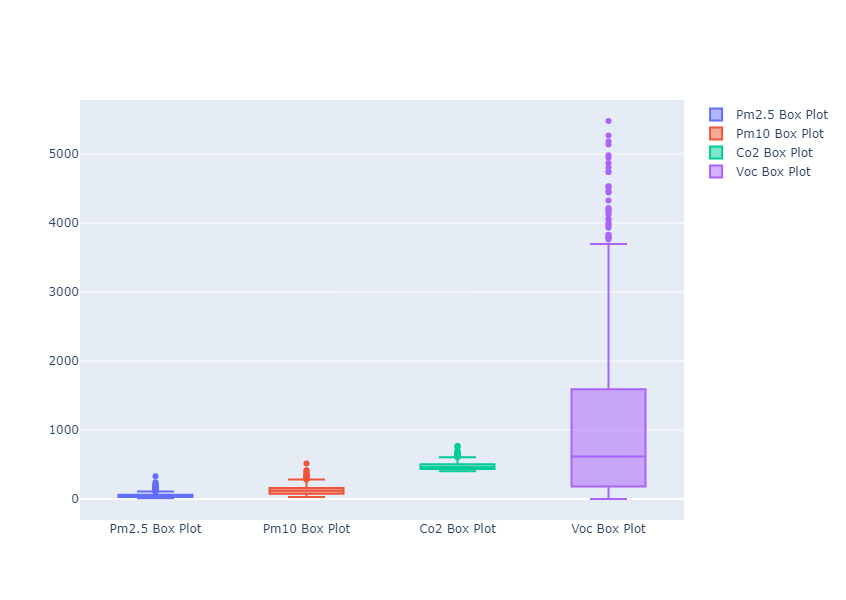

In [8]:
fig_box1 = go.Figure()

# Add Pm2.5 box plot
fig_box1.add_trace(go.Box(y=dwarka_df['pm25_1201240072'], name='Pm2.5 Box Plot'))
# Add Pm10 box plot as a subplot
fig_box1.add_trace(go.Box(y=dwarka_df['pm10_1201240072'], name='Pm10 Box Plot'))
#Add co2 box plot 
fig_box1.add_trace(go.Box(y=dwarka_df['co2_1201240072'], name='Co2 Box Plot'))
#Add voc box plot 
fig_box1.add_trace(go.Box(y=dwarka_df['voc_1201240072'], name='Voc Box Plot'))

# Update layout to adjust width and height
fig_box1.update_layout(width=900, height=600)
fig_box1.show()

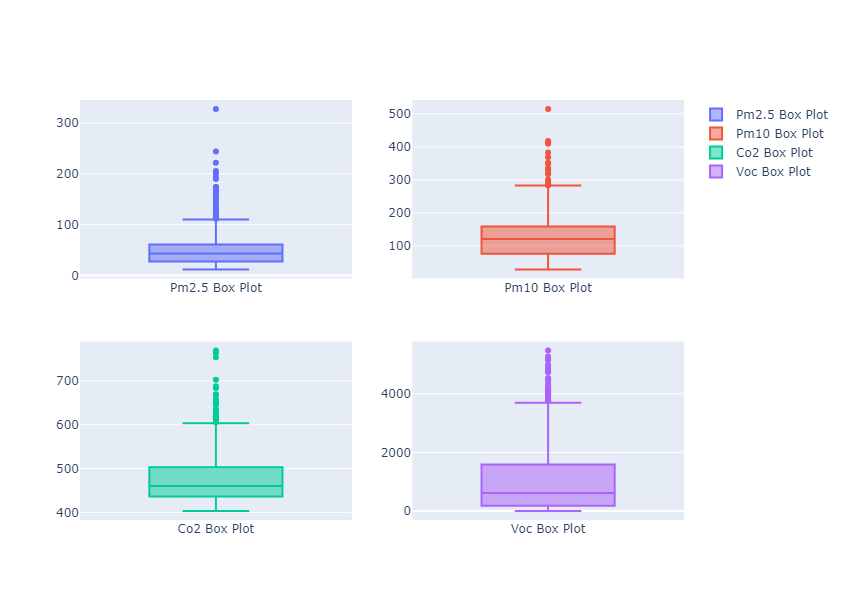

In [9]:
fig1_box = make_subplots(rows=2, cols=2)

# Add Pm2.5 box plot
fig1_box.add_trace(go.Box(y=dwarka_df['pm25_1201240072'], name='Pm2.5 Box Plot'), row=1, col=1)
# Add Pm10 box plot
fig1_box.add_trace(go.Box(y=dwarka_df['pm10_1201240072'], name='Pm10 Box Plot'), row=1, col=2)
# Add Co2 box plot
fig1_box.add_trace(go.Box(y=dwarka_df['co2_1201240072'], name='Co2 Box Plot'), row=2, col=1)
# Add Voc box plot
fig1_box.add_trace(go.Box(y=dwarka_df['voc_1201240072'], name='Voc Box Plot'), row=2, col=2)

# Update layout to adjust width and height
fig1_box.update_layout(width=900, height=600)
fig1_box.show()

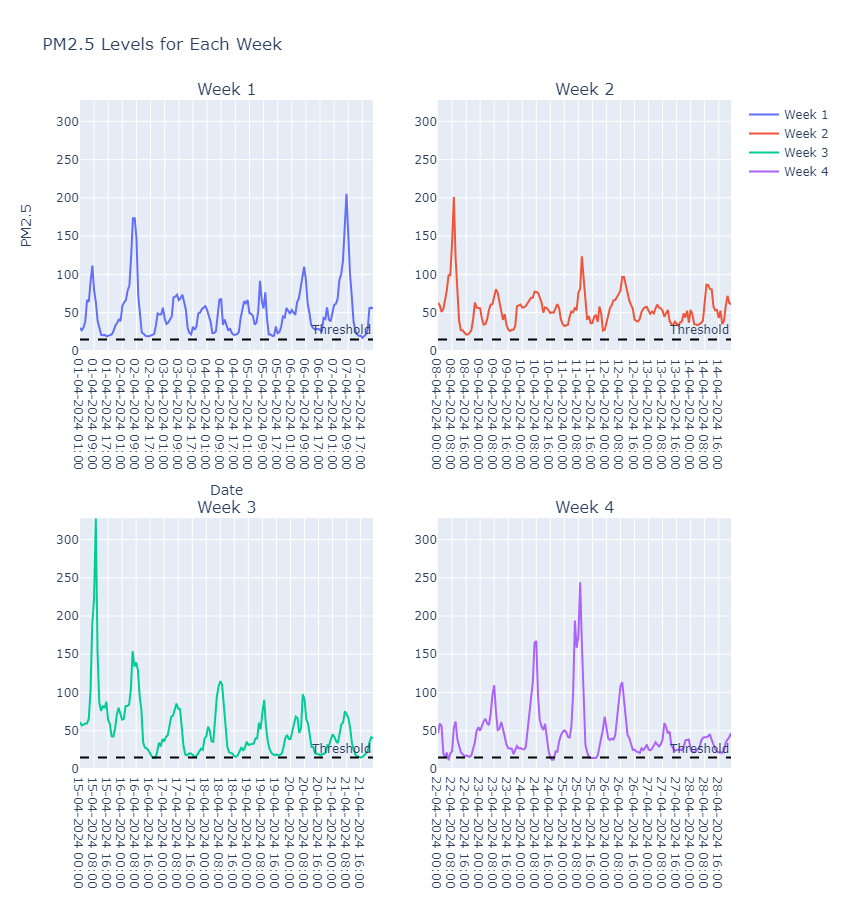

In [52]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Week 1", "Week 2", "Week 3", "Week 4"))
max_pm25_value =dwarka_df['pm25_1201240072'].max()

# Define date ranges for each week
date_ranges = [
    ('01-04-2024', '07/04/2024'),
    ('08-04-2024', '14/04/2024'),
    ('15-04-2024', '21/04/2024'),
    ('22-04-2024', '28/04/2024')
]
# Plot each week's data in a separate subplot
for i, (start_date, end_date) in enumerate(date_ranges, start=1):
    # Filter data for the current week
    week_data = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]
    fig.append_trace(go.Scatter(x=week_data['CreatedDate'], y=week_data['pm25_1201240072'], name=f'Week {i}'),row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig.add_hline(y=15, line_dash="dash", line_color="black", annotation_text="Threshold",row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    
     # to make all y-axis of the same size;
    fig.update_yaxes(range=[0, max_pm25_value],row=(i-1)//2 + 1, col=(i-1)%2 + 1)
# Update layout
fig.update_layout(title='PM2.5 Levels for Each Week',
                  xaxis_title='Date',
                  yaxis_title='PM2.5',
                 height=900,  # specify height
                  width=1000)
fig.show()

In [11]:
# Find the index of the row with the lowest PM2.5 value
min_pm25_index = dwarka_df['pm25_1201240072'].idxmin()
# Get the corresponding CreatedDate
min_pm25_created_date = dwarka_df.loc[min_pm25_index, 'CreatedDate']

print("Lowest PM2.5 value:", dwarka_df.loc[min_pm25_index, 'pm25_1201240072'])
print("Corresponding CreatedDate:", min_pm25_created_date)

Lowest PM2.5 value: 11.5
Corresponding CreatedDate: 22-04-2024 06:00


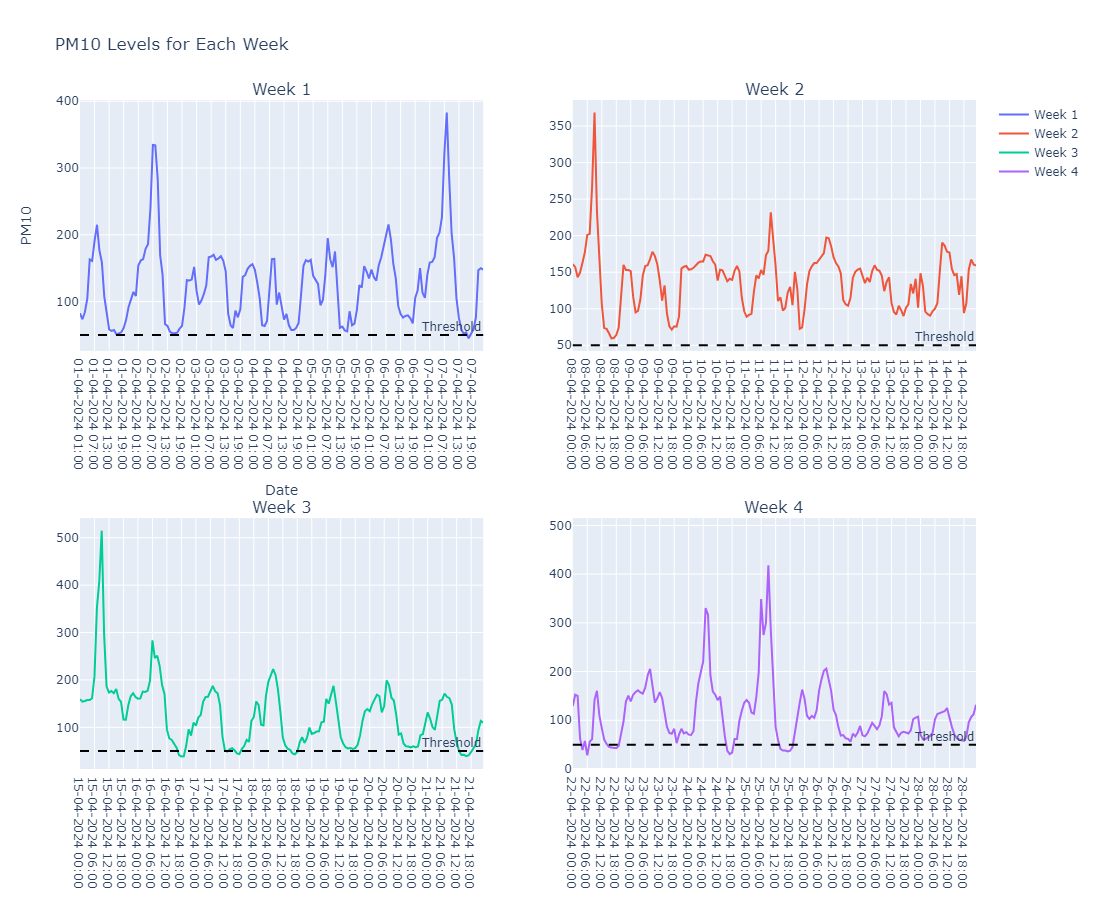

In [51]:
fig1 = make_subplots(rows=2, cols=2, subplot_titles=("Week 1", "Week 2", "Week 3", "Week 4"))
max_pm10_value =dwarka_df['pm10_1201240072'].max()
# Define date ranges for each week
date_ranges = [
    ('01-04-2024', '07/04/2024'),
    ('08-04-2024', '14/04/2024'),
    ('15-04-2024', '21/04/2024'),
    ('22-04-2024', '28/04/2024')
]
# Plot each week's data in a separate subplot
for i, (start_date, end_date) in enumerate(date_ranges, start=1):
    # Filter data for the current week
    week_data1 = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]
    fig1.append_trace(go.Scatter(x=week_data1['CreatedDate'], y=week_data1['pm10_1201240072'], name=f'Week {i}'),row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig1.add_hline(y=50, line_dash="dash", line_color="black", annotation_text="Threshold",row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    
     # to make all y-axis of the same size;
    fig1.update_yaxes(range=[0, max_pm10_value], row=row, col=col)
# Update layout
fig1.update_layout(title='PM10 Levels for Each Week',
                  xaxis_title='Date',
                  yaxis_title='PM10',
                  height=900, # specify height
                  width=1000)
fig1.show()

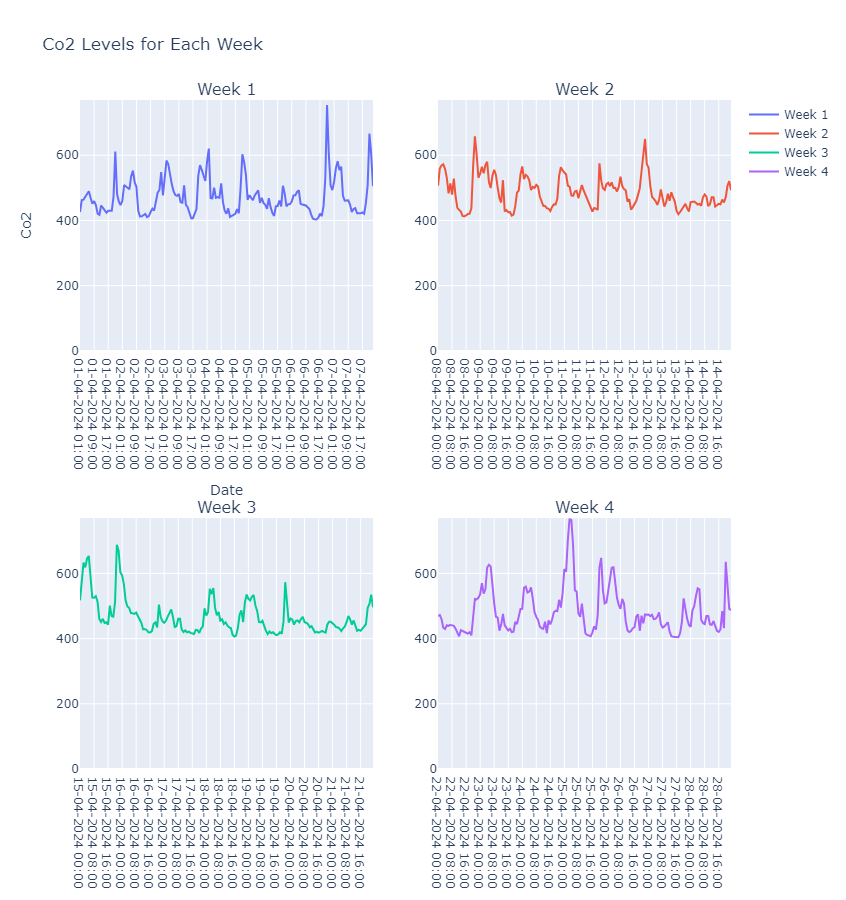

In [43]:
fig2 = make_subplots(rows=2, cols=2, subplot_titles=("Week 1", "Week 2", "Week 3", "Week 4"))
max_co2_value =dwarka_df['co2_1201240072'].max()
# Define date ranges for each week
date_ranges = [
    ('01-04-2024', '07/04/2024'),
    ('08-04-2024', '14/04/2024'),
    ('15-04-2024', '21/04/2024'),
    ('22-04-2024', '28/04/2024')
]
# Plot each week's data in a separate subplot
for i, (start_date, end_date) in enumerate(date_ranges, start=1):
    # Filter data for the current week
    week_data2 = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]
    fig2.append_trace(go.Scatter(x=week_data2['CreatedDate'], y=week_data2['co2_1201240072'], name=f'Week {i}'),row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig2.add_hline(y=1000, line_dash="dash", line_color="black", annotation_text="Threshold",row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    
     # to make all y-axis of the same size;
    fig2.update_yaxes(range=[0, max_co2_value], row=(i-1)//2 + 1, col=(i-1)%2 + 1)
fig2.update_layout(title='Co2 Levels for Each Week',
                  xaxis_title='Date',
                  yaxis_title='Co2',
                 height=900,  # specify height
                  width=1000)
fig2.show()

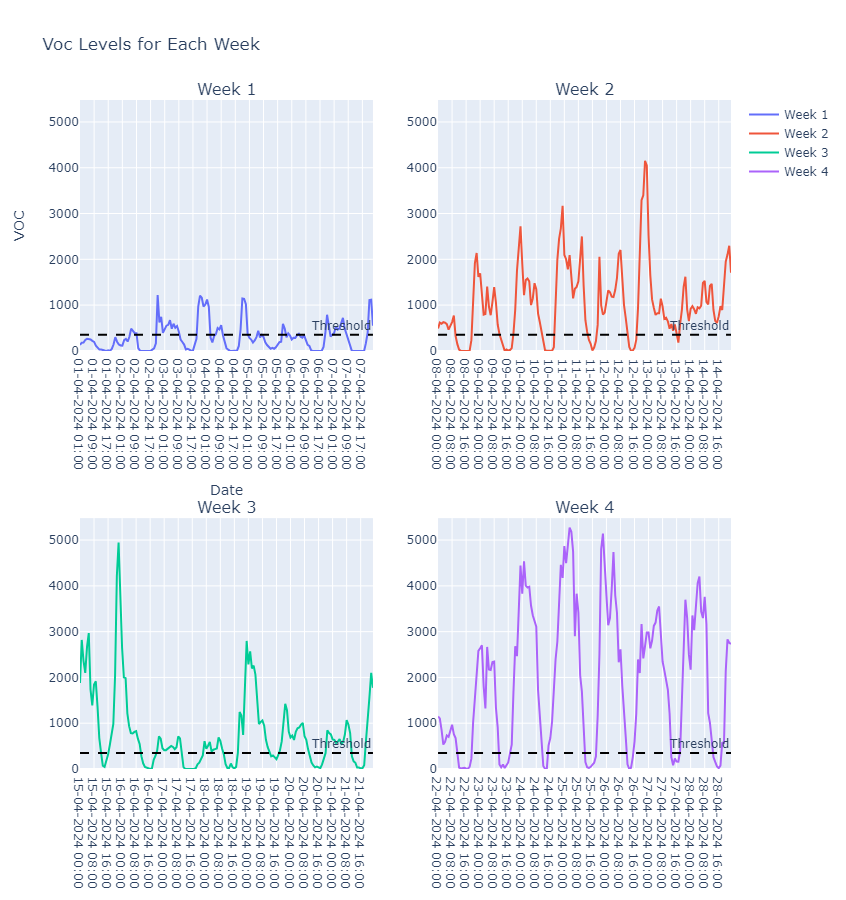

In [40]:
fig3 = make_subplots(rows=2, cols=2, subplot_titles=("Week 1", "Week 2", "Week 3", "Week 4"))
max_voc_value =dwarka_df['voc_1201240072'].max()
date_ranges = [
    ('01-04-2024', '07/04/2024'),
    ('08-04-2024', '14/04/2024'),
    ('15-04-2024', '21/04/2024'),
    ('22-04-2024', '28/04/2024')
]
# Plot each week's data in a separate subplot
for i, (start_date, end_date) in enumerate(date_ranges, start=1):
    # Filter data for the current week
    week_data3 = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]
    fig3.append_trace(go.Scatter(x=week_data3['CreatedDate'], y=week_data3['voc_1201240072'], name=f'Week {i}'), row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig3.add_hline(y=350, line_dash="dash", line_color="black", annotation_text="Threshold", row=(i-1)//2 + 1, col=(i-1)%2 + 1)
     # to make all y-axis of the same size;
    fig3.update_yaxes(range=[0, max_voc_value], row=(i-1)//2 + 1, col=(i-1)%2 + 1)

# Update layout
fig3.update_layout(title='Voc Levels for Each Week',
                  xaxis_title='Date',
                  yaxis_title='VOC',
                 height=900,  # specify height
                  width=1000)
fig3.show()

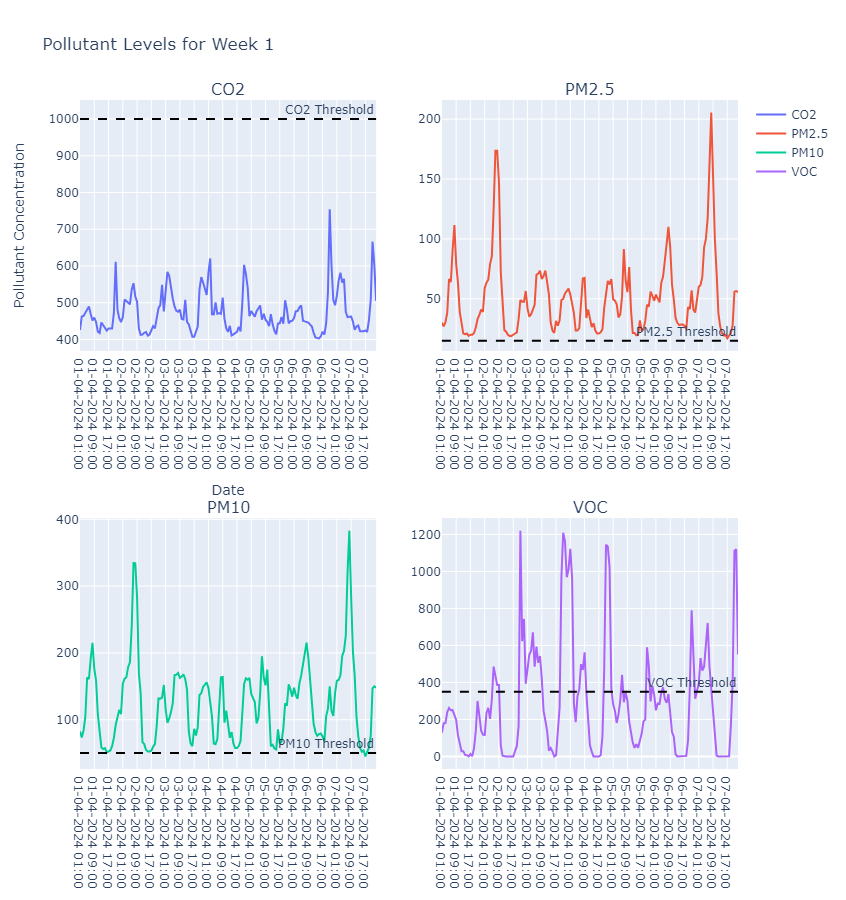

In [37]:
fig4 = make_subplots(rows=2, cols=2, subplot_titles=("CO2", "PM2.5", "PM10", "VOC"))
# Date range for Week 1
start_date, end_date = '01-04-2024', '07/04/2024'
# Filter data for Week 1
week_data1 = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]

# Pollutants and their titles
pollutants = ['co2_1201240072', 'pm25_1201240072', 'pm10_1201240072', 'voc_1201240072']
titles = ["CO2", "PM2.5", "PM10", "VOC"]
thresholds = [1000, 15, 50, 350]

for i, (pollutant, title, threshold) in enumerate(zip(pollutants, titles, thresholds), start=1):
    fig4.add_trace(go.Scatter(x=week_data1['CreatedDate'], y=week_data1[pollutant], name=title), row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig4.add_hline(y=threshold, line_dash="dash", line_color="black", annotation_text=f"{title} Threshold", row=(i-1)//2 + 1, col=(i-1)%2 + 1)

# Update layout
fig4.update_layout(
    title='Pollutant Levels for Week 1',
    xaxis_title='Date',
    yaxis_title='Pollutant Concentration',
    height=900,
    width=1000
)
fig4.show()

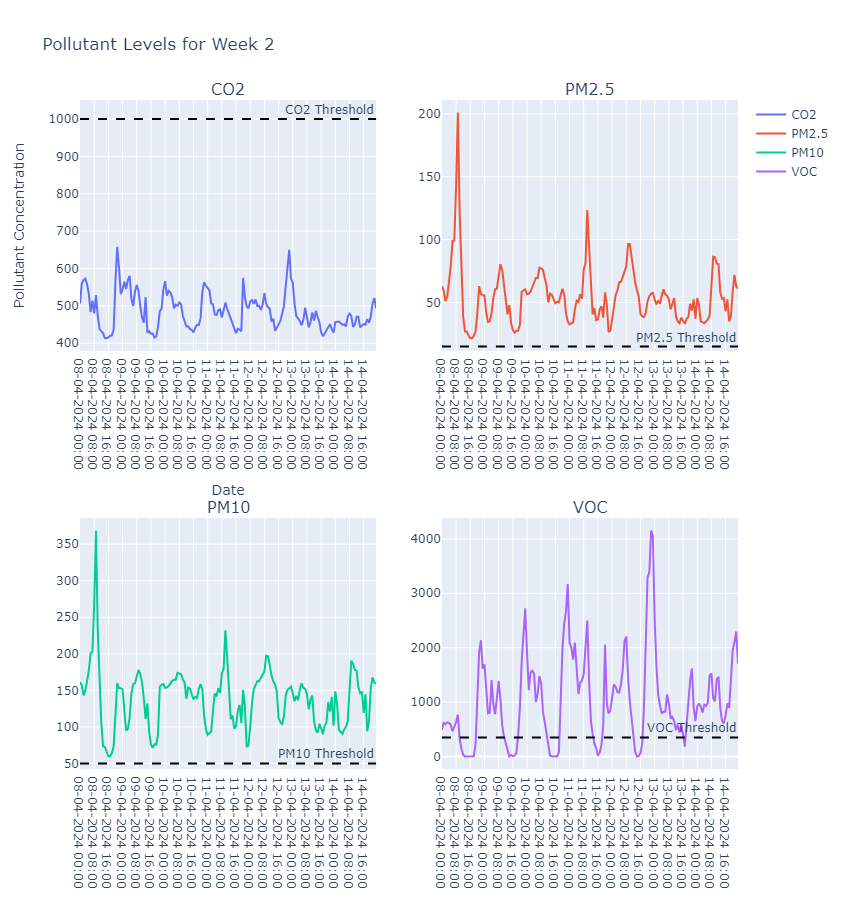

In [29]:
fig5 = make_subplots(rows=2, cols=2, subplot_titles=("CO2", "PM2.5", "PM10", "VOC"))
# Date range for Week 3
start_date, end_date = '08-04-2024', '14/04/2024'
# Filter data for Week 3
week_data2 = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]

# Pollutants and their titles
pollutants = ['co2_1201240072', 'pm25_1201240072', 'pm10_1201240072', 'voc_1201240072']
titles = ["CO2", "PM2.5", "PM10", "VOC"]
thresholds = [1000, 15, 50, 350]

for i, (pollutant, title, threshold) in enumerate(zip(pollutants, titles, thresholds), start=1):
    fig5.add_trace(go.Scatter(x=week_data2['CreatedDate'], y=week_data2[pollutant], name=title), row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig5.add_hline(y=threshold, line_dash="dash", line_color="black", annotation_text=f"{title} Threshold", row=(i-1)//2 + 1, col=(i-1)%2 + 1)

# Update layout
fig5.update_layout(
    title='Pollutant Levels for Week 2',
    xaxis_title='Date',
    yaxis_title='Pollutant Concentration',
    height=900,
    width=1000
)
fig5.show()

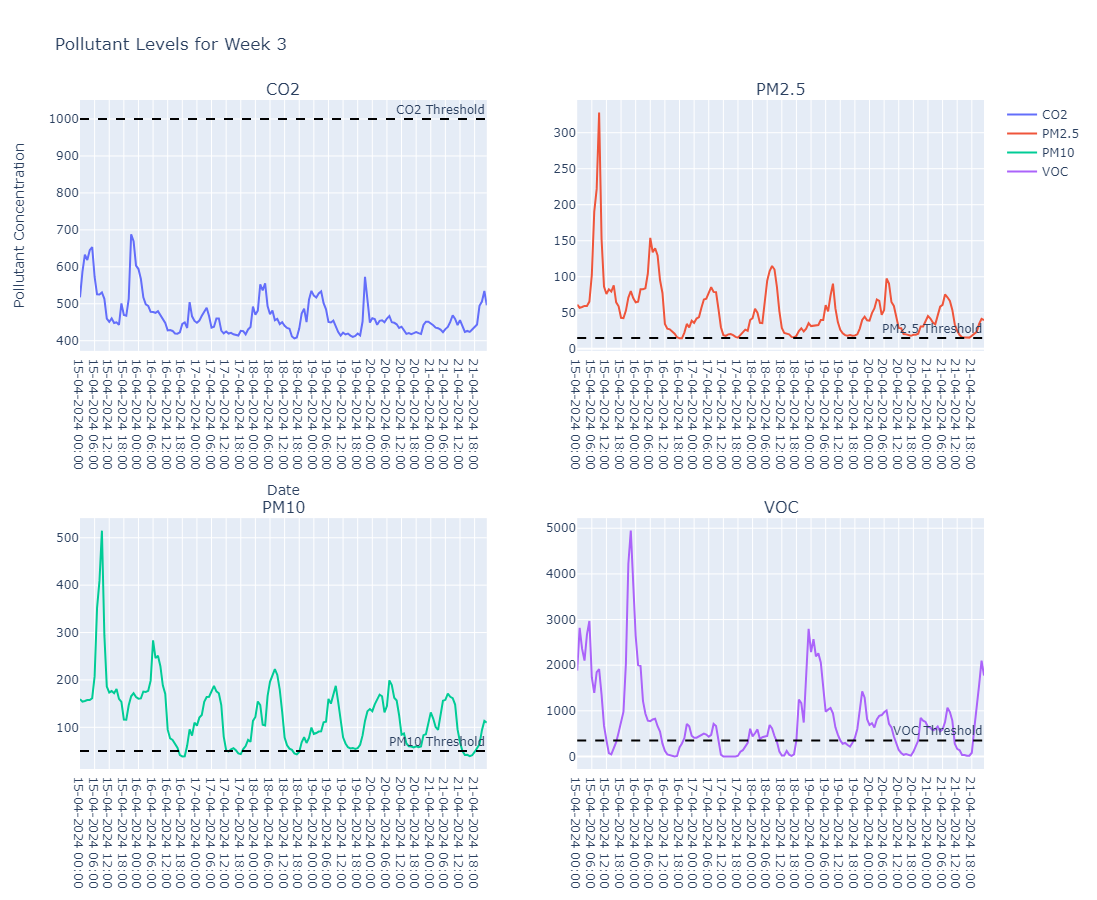

In [33]:
fig6 = make_subplots(rows=2, cols=2, subplot_titles=("CO2", "PM2.5", "PM10", "VOC"))
# Date range for Week 3
start_date, end_date = '15-04-2024', '21/04/2024'
# Filter data for Week 3
week_data3 = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]

# Pollutants and their titles
pollutants = ['co2_1201240072', 'pm25_1201240072', 'pm10_1201240072', 'voc_1201240072']
titles = ["CO2", "PM2.5", "PM10", "VOC"]
thresholds = [1000, 15, 50, 350]

for i, (pollutant, title, threshold) in enumerate(zip(pollutants, titles, thresholds), start=1):
    fig6.add_trace(go.Scatter(x=week_data3['CreatedDate'], y=week_data3[pollutant], name=title), row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig6.add_hline(y=threshold, line_dash="dash", line_color="black", annotation_text=f"{title} Threshold", row=(i-1)//2 + 1, col=(i-1)%2 + 1)

# Update layout
fig6.update_layout(
    title='Pollutant Levels for Week 3',
    xaxis_title='Date',
    yaxis_title='Pollutant Concentration',
    height=900,
    width=1000
)
fig6.show()

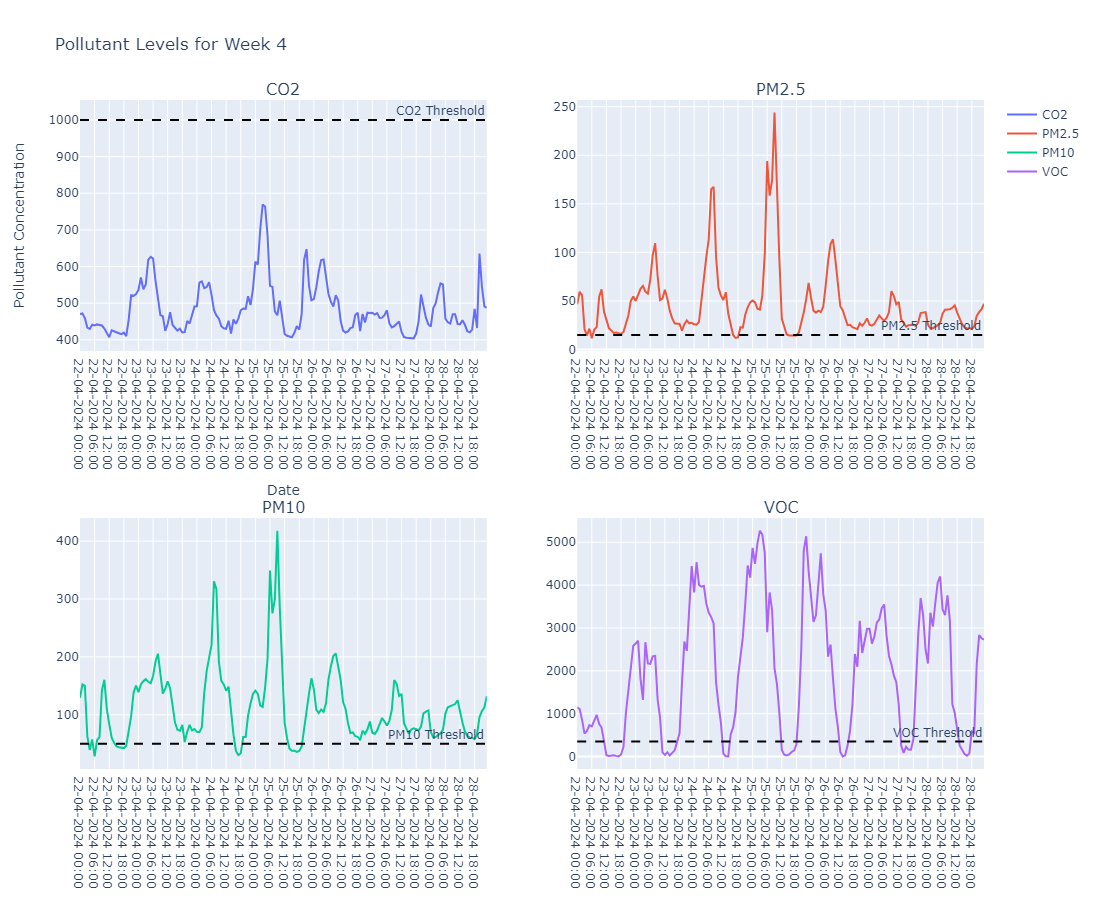

In [30]:
fig7 = make_subplots(rows=2, cols=2, subplot_titles=("CO2", "PM2.5", "PM10", "VOC"))
# Date range for Week 4
start_date, end_date = '22-04-2024', '28/04/2024'
# Filter data for Week 4
week_data4 = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]

# Pollutants and their titles
pollutants = ['co2_1201240072', 'pm25_1201240072', 'pm10_1201240072', 'voc_1201240072']
titles = ["CO2", "PM2.5", "PM10", "VOC"]
thresholds = [1000, 15, 50, 350]

for i, (pollutant, title, threshold) in enumerate(zip(pollutants, titles, thresholds), start=1):
    fig7.add_trace(go.Scatter(x=week_data4['CreatedDate'], y=week_data4[pollutant], name=title), row=(i-1)//2 + 1, col=(i-1)%2 + 1)
    fig7.add_hline(y=threshold, line_dash="dash", line_color="black", annotation_text=f"{title} Threshold", row=(i-1)//2 + 1, col=(i-1)%2 + 1)

# Update layout
fig7.update_layout(
    title='Pollutant Levels for Week 4',
    xaxis_title='Date',
    yaxis_title='Pollutant Concentration',
    height=900,
    width=1000
)
fig7.show()

#### Outdoor

In [10]:
dwarka_out_df=pd.read_csv('Dwarka Outdoor 1 month.csv')

In [11]:
dwarka_out_df.shape

(719, 3)

In [12]:
dwarka_out_df.head()

CreatedDate  Pm2.5    Pm10
0  01-04-2024 01:00  27.50   79.50
1  01-04-2024 02:00  34.75   75.25
2  01-04-2024 03:00  35.50   71.75
3  01-04-2024 04:00  46.50   88.00
4  01-04-2024 05:00  92.50  128.00

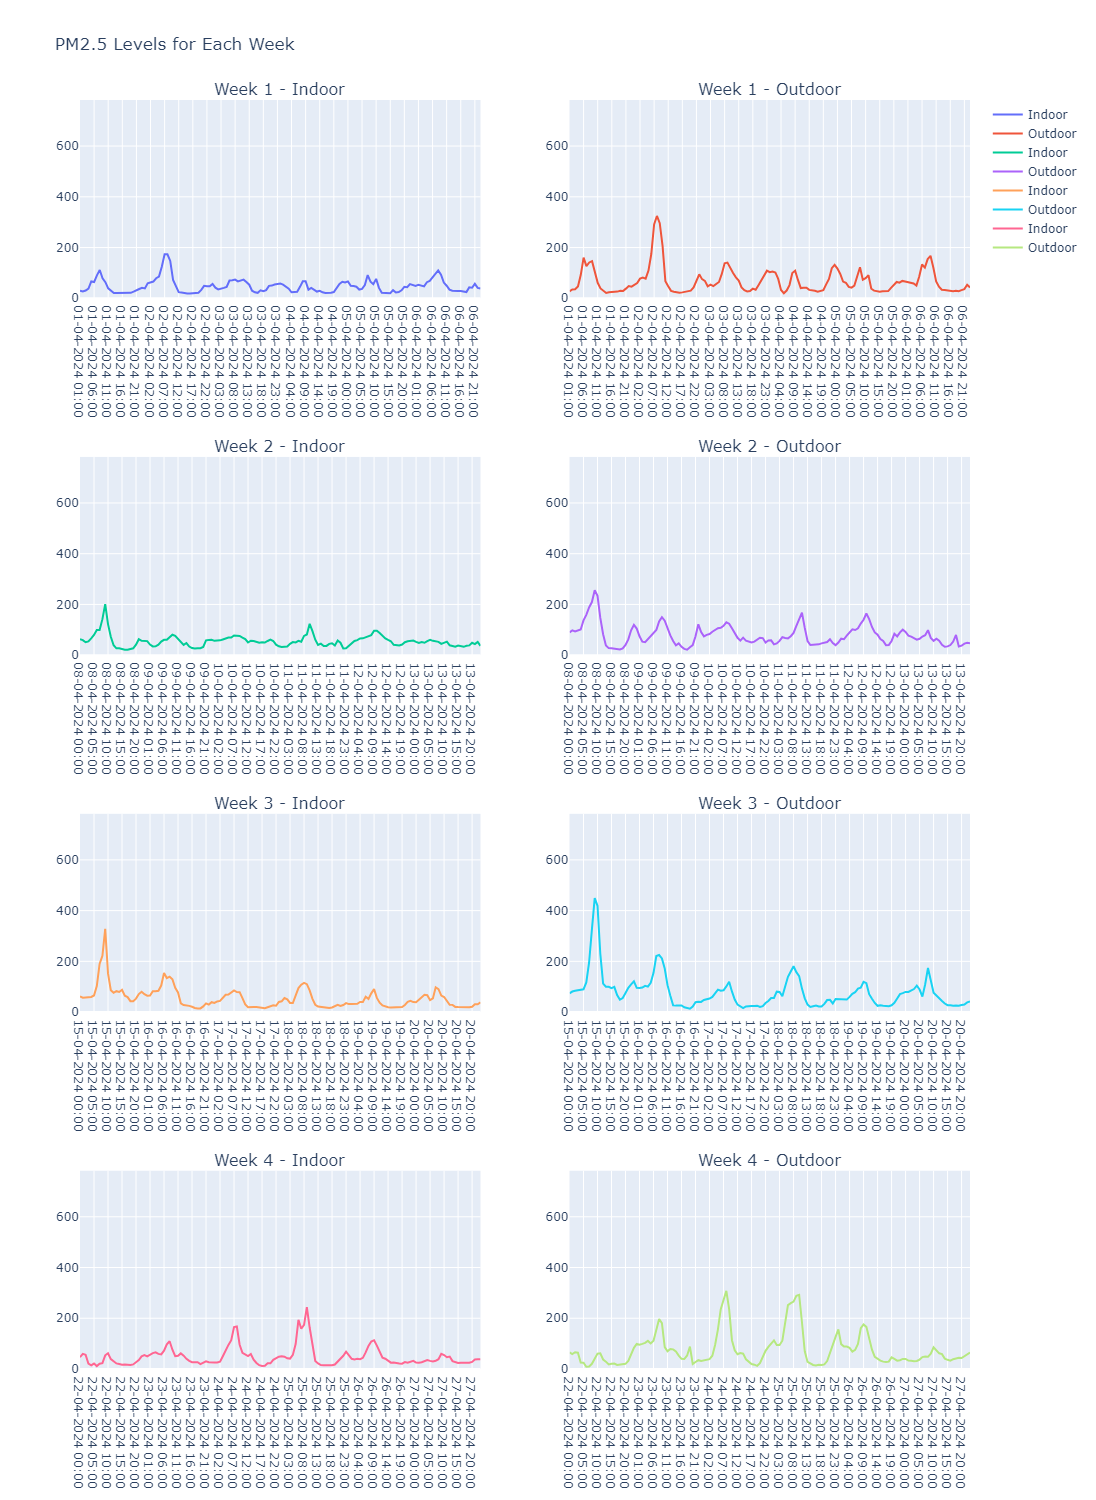

In [18]:
fig8 = make_subplots(rows=4, cols=2, subplot_titles=[
    "Week 1 - Indoor", "Week 1 - Outdoor",
    "Week 2 - Indoor", "Week 2 - Outdoor",
    "Week 3 - Indoor", "Week 3 - Outdoor",
    "Week 4 - Indoor", "Week 4 - Outdoor"
])
max_value1 = max(dwarka_df['pm25_1201240072'].max(), dwarka_out_df['Pm10'].max())
# Define date ranges for each week
date_ranges = [
    ('01-04-2024', '07-04-2024'),
    ('08-04-2024', '14-04-2024'),
    ('15-04-2024', '21-04-2024'),
    ('22-04-2024', '28-04-2024')
]
# Plot each week's data in a separate subplot
for i, (start_date, end_date) in enumerate(date_ranges):
    indoor_data = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]
    outdoor_data = dwarka_out_df[(dwarka_out_df['CreatedDate'] >= start_date) & (dwarka_out_df['CreatedDate'] <= end_date)]
    
    fig8.add_trace(go.Scatter(x=indoor_data['CreatedDate'], y=indoor_data['pm25_1201240072'], name='Indoor'), row=i+1, col=1)
    fig8.add_trace(go.Scatter(x=outdoor_data['CreatedDate'], y=outdoor_data['Pm2.5'], name='Outdoor'), row=i+1, col=2)
# Update layout and y-axis range
fig8.update_layout(title='PM2.5 Levels for Each Week', height=1500, width=1000)
fig8.update_yaxes(range=[0, max_value1])
fig8.show()

In [40]:
# Define date ranges for each week
date_ranges = [
    ('01-04-2024', '07/04/2024'),
    ('08-04-2024', '14/04/2024'),
    ('15-04-2024', '21/04/2024'),
    ('22-04-2024', '28/04/2024')
]
# Initialize a list to store correlations for each week
correlation_weekly_Pm25 = []
# Plot each week's data in a separate subplot
for i, (start_date, end_date) in enumerate(date_ranges, start=1):
    # Filter data for the current week
    indoor_data3=  dwarka_df[( dwarka_df['CreatedDate'] >= start_date) & ( dwarka_df['CreatedDate'] <= end_date)]
    outdoor_data3 =  dwarka_out_df[( dwarka_out_df['CreatedDate'] >= start_date) & ( dwarka_out_df['CreatedDate'] <= end_date)]
     # Calculate correlation for the current week
    correlation_Pm25 = indoor_data3['pm25_1201240072'].corr(outdoor_data3['Pm2.5'])
    
    # Append correlation to the list
    correlation_weekly_Pm25.append(correlation_Pm25)

# Print correlations for each week
for i, correlation_Pm25 in enumerate(correlation_weekly_Pm25, start=1):
    print(f"Correlation for Pm2.5 Indoor & Outdoor for Week {i}: {correlation_Pm25}")


Correlation for Pm2.5 Indoor & Outdoor for Week 1: 0.9354002587285886
Correlation for Pm2.5 Indoor & Outdoor for Week 2: 0.9080546814745821
Correlation for Pm2.5 Indoor & Outdoor for Week 3: 0.9268983533046506
Correlation for Pm2.5 Indoor & Outdoor for Week 4: 0.9373825742643623


In [39]:
# Define date ranges for each week
date_ranges1 = [
    ('01-04-2024', '07/04/2024'),
    ('08-04-2024', '14/04/2024'),
    ('15-04-2024', '21/04/2024'),
    ('22-04-2024', '28/04/2024')
]
# Initialize a list to store correlations for each week
correlation_weekly_for_Pm10 = []
# Plot each week's data in a separate subplot
for i, (start_date, end_date) in enumerate(date_ranges1, start=1):
    # Filter data for the current week
    indoor_data5=  dwarka_df[( dwarka_df['CreatedDate'] >= start_date) & ( dwarka_df['CreatedDate'] <= end_date)]
    outdoor_data5= dwarka_out_df[( dwarka_out_df['CreatedDate'] >= start_date) & ( dwarka_out_df['CreatedDate'] <= end_date)]
     # Calculate correlation for the current week
    correlation_for_Pm10 = indoor_data5['pm10_1201240072'].corr(outdoor_data5['Pm10'])
    
    # Append correlation to the list
    correlation_weekly_for_Pm10.append(correlation_for_Pm10)

# Print correlations for each week
for i, correlation_for_Pm10 in enumerate(correlation_weekly_for_Pm10, start=1):
    print(f"Correlation Pm10 Indoor & Outdoor for Week {i}: {correlation_for_Pm10}")


Correlation Pm10 Indoor & Outdoor for Week 1: 0.7068306014189003
Correlation Pm10 Indoor & Outdoor for Week 2: 0.631574197045527
Correlation Pm10 Indoor & Outdoor for Week 3: 0.7459886267557774
Correlation Pm10 Indoor & Outdoor for Week 4: 0.7617665551834061


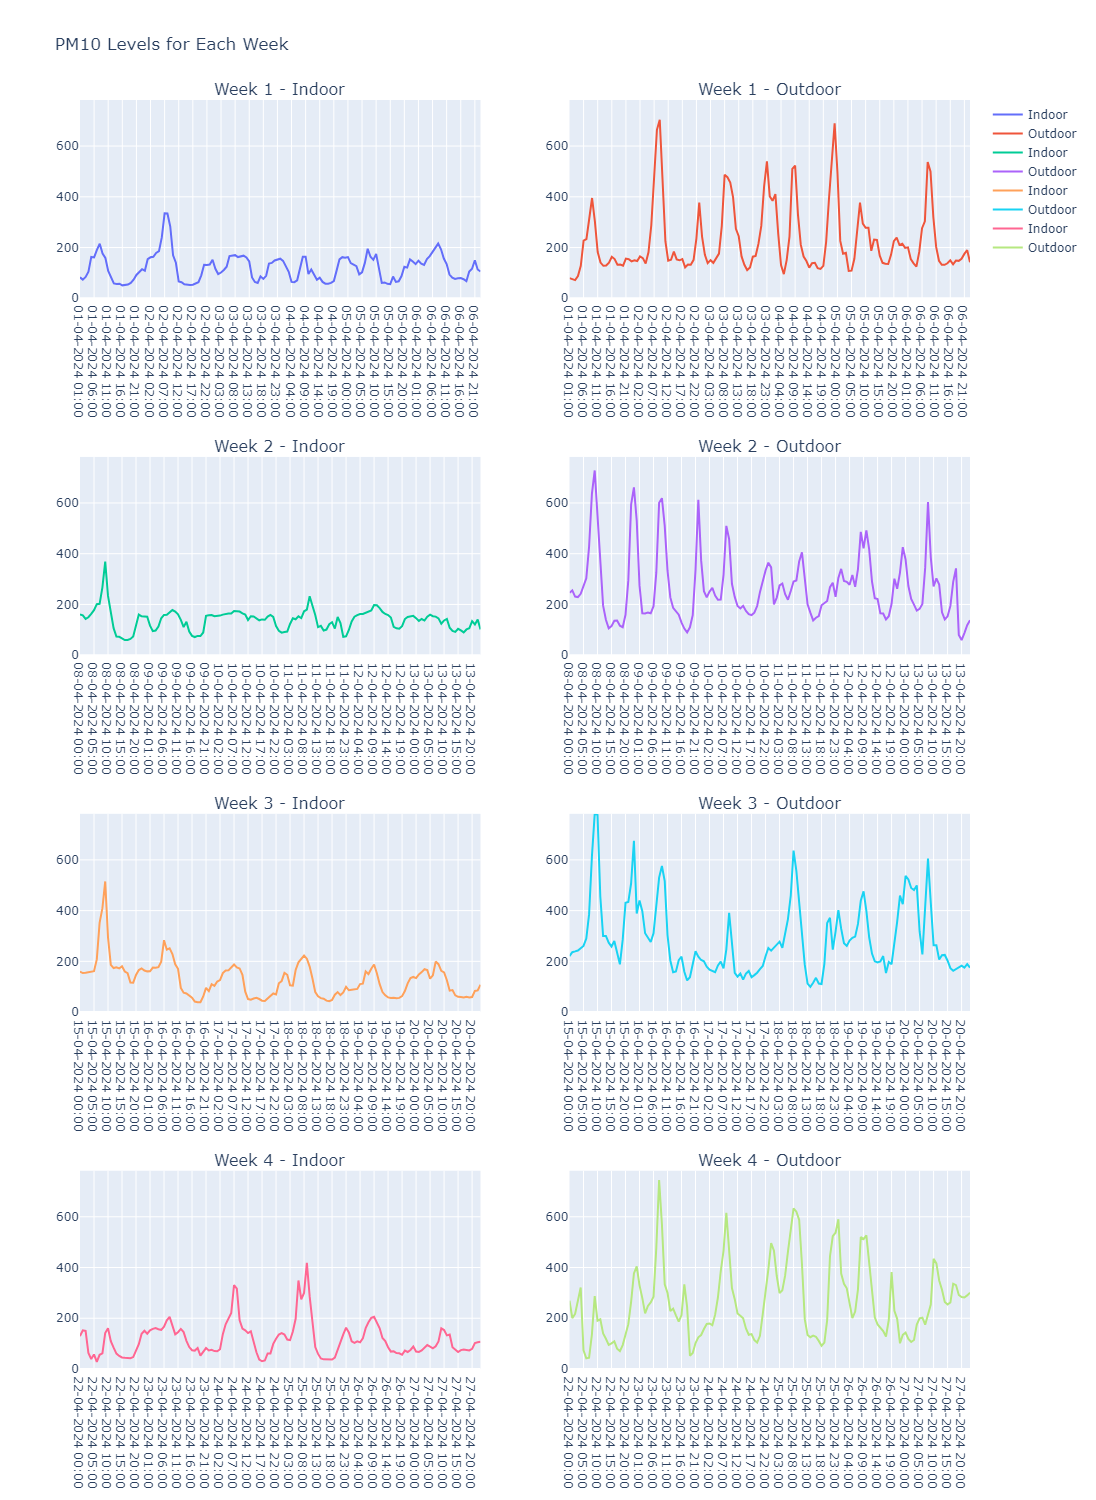

In [14]:
fig9 = make_subplots(rows=4, cols=2, subplot_titles=[
    "Week 1 - Indoor", "Week 1 - Outdoor",
    "Week 2 - Indoor", "Week 2 - Outdoor",
    "Week 3 - Indoor", "Week 3 - Outdoor",
    "Week 4 - Indoor", "Week 4 - Outdoor"
])
max_value1 = max(dwarka_df['pm10_1201240072'].max(), dwarka_out_df['Pm10'].max())
# Define date ranges for each week
date_ranges = [
    ('01-04-2024', '07-04-2024'),
    ('08-04-2024', '14-04-2024'),
    ('15-04-2024', '21-04-2024'),
    ('22-04-2024', '28-04-2024')
]
# Plot each week's data in a separate subplot
for i, (start_date, end_date) in enumerate(date_ranges):
    indoor_data6 = dwarka_df[(dwarka_df['CreatedDate'] >= start_date) & (dwarka_df['CreatedDate'] <= end_date)]
    outdoor_data6 = dwarka_out_df[(dwarka_out_df['CreatedDate'] >= start_date) & (dwarka_out_df['CreatedDate'] <= end_date)]
    
    fig9.add_trace(go.Scatter(x=indoor_data6['CreatedDate'], y=indoor_data6['pm10_1201240072'], name='Indoor'), row=i+1, col=1)
    fig9.add_trace(go.Scatter(x=outdoor_data6['CreatedDate'], y=outdoor_data6['Pm10'], name='Outdoor'), row=i+1, col=2)

# Update layout and y-axis range
fig9.update_layout(title='PM10 Levels for Each Week', height=1500, width=1000)
fig9.update_yaxes(range=[0, max_value1])
fig9.show()